In [51]:
from lightkurve import KeplerTargetPixelFile, KeplerLightCurveFile
import numpy as np
import matplotlib.pyplot as plt
import george
from george import kernels
from george.modeling import Model

def cleanTPF(tpf):
    cleanLC = tpf.to_lightcurve(aperture_mask = tpf.pipeline_mask)
    cleanLC = cleanLC.remove_nans()
    cleanLC = cleanLC.flatten(window_length = 101)
    return cleanLC

def cleanLCF(lc):
    lc = lc.remove_nans().flatten(window_length = 101)
    return lc

Found 1 File(s)
INFO: Found cached file ./mastDownload/K2/ktwo200164267-c12_lc/ktwo200164267-c12_lpd-targ.fits.gz with expected size 6718530. [astroquery.query]


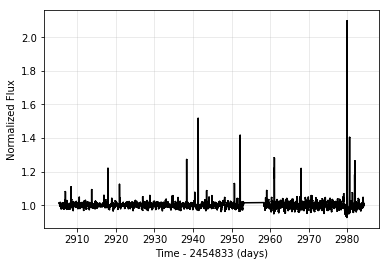

In [10]:
tpf = KeplerTargetPixelFile.from_archive(200164267)
%matplotlib inline
lc = cleanTPF(tpf)
lc.plot()

In [11]:
tpf.interact()

Loading BokehJS ...

Output()

Found 1 File(s)
INFO: Found cached file ./mastDownload/K2/ktwo200164267-c12_lc/ktwo200164267-c12_llc.fits with expected size 417600. [astroquery.query]


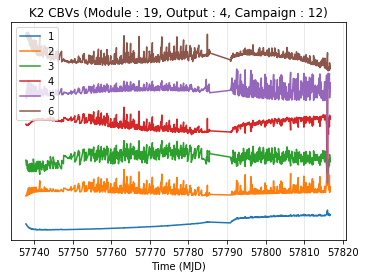

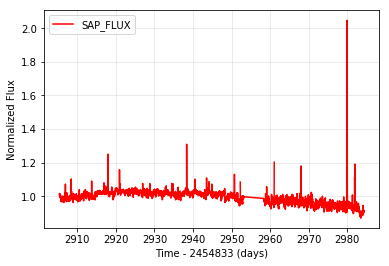

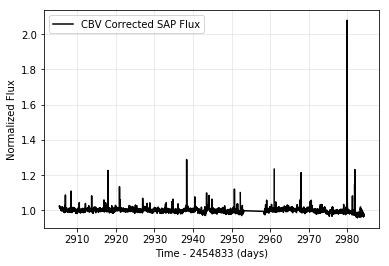

In [12]:
from lightkurve.correctors import KeplerCBVCorrector
lcf = KeplerLightCurveFile.from_archive(200164267)
lc = lcf.SAP_FLUX
KeplerCBVCorrector(lcf).plot_cbvs([1,2,3,4,5,6]) # trend plotting

corrLCF = KeplerCBVCorrector(lcf).correct([1,2,3,4,5])

uncorr = lc.plot(color = 'red', label = 'SAP_FLUX', linestyle = '-')
corrLCF.plot(label = 'CBV Corrected SAP Flux')


100%|██████████| 30/30 [00:02<00:00, 14.68it/s]


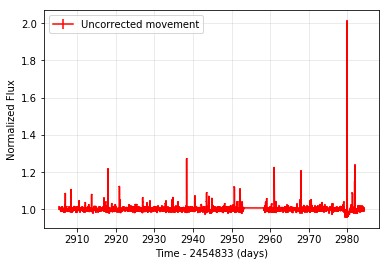

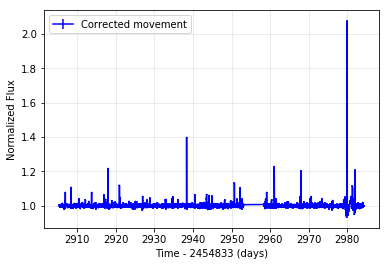

In [13]:
lc_pds = lcf.PDCSAP_FLUX
lc_pds = cleanLCF(lc_pds)
corrLC = lc_pds.correct(windows = 30)
lc_pds.plot(color = 'red', label = 'Uncorrected movement')
corrLC.plot(color = 'blue', label = 'Corrected movement')

In [14]:
tpf.interact(lc = corrLC) #interact GUI for the movement corrected LC

Loading BokehJS ...

Output()

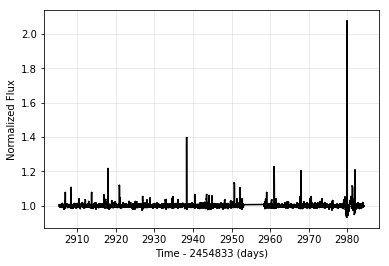

In [42]:
corrLC.plot()